In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Carga de la base de datos
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Análisis de Variables

In [3]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


La variable objetivo al parecer no tiene una alta correlacion con las variables numericas del dataset, descartamos algunas de estas variables.

In [4]:
titanic=titanic.drop('PassengerId',axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Valores Faltantes

In [5]:
# Número de datos nulos por feature
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Embarked

In [6]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
titanic[titanic['Embarked'].isnull()==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
titanic['Embarked'].fillna(value='S',inplace=True)

In [9]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Debido al gran numero de valores faltantes en Age y en Cabin se hace un analisis un poco mas profundo sobre estas variables

## Variables Dummy

In [10]:
#Encoder para variables categoricas
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

#Variable Female/Male
encoder_titanic = pd.DataFrame(one_hot_encoder.fit_transform(titanic[['Sex']]).toarray())
titanic =titanic.join(encoder_titanic)
titanic.rename(columns={0:'Female',
                        1:'Male'},
               inplace=True)

#Variable Embarked
label_encoder=LabelEncoder()
titanic['Embarked']=label_encoder.fit_transform(titanic['Embarked'])


In [11]:
titanic=titanic.drop('Sex',axis=1)
titanic

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,1.0,0.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,2,0.0,1.0
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,2,1.0,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,2,1.0,0.0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0.0,1.0


In [12]:
#Creando nueva columna para la variable nombre
titanic['Name_Pref']=np.nan

#LLenado de la variable
lista_pref=['Mr.','Miss.','Mrs.','Master.','Dr.','Capt.','Mlle.','Col.','Rev.','Major.','Mme.','Don.','Ms.','Lady.','Sir.','Countess.','Jonkheer.']
for i in range(len(titanic)):
    for j in lista_pref:
        if j in titanic['Name'][i]:
            titanic['Name_Pref'][i]=j

C:\Users\perezm47\AppData\Local\Temp/ipykernel_17040/2252012886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Name_Pref'][i]=j
C:\Users\perezm47\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
titanic['Name_Pref']=label_encoder.fit_transform(titanic['Name_Pref'])
titanic=titanic.drop(['Name','Ticket'],axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Female,Male,Name_Pref
0,0,3,22.0,1,0,7.2500,NaN,2,0.0,1.0,12
1,1,1,38.0,1,0,71.2833,C85,0,1.0,0.0,13
2,1,3,26.0,0,0,7.9250,NaN,2,1.0,0.0,9
3,1,1,35.0,1,0,53.1000,C123,2,1.0,0.0,13
4,0,3,35.0,0,0,8.0500,NaN,2,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,2,0.0,1.0,15
887,1,1,19.0,0,0,30.0000,B42,2,1.0,0.0,9
888,0,3,NaN,1,2,23.4500,NaN,2,1.0,0.0,9
889,1,1,26.0,0,0,30.0000,C148,0,0.0,1.0,12


In [14]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female,Male,Name_Pref
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.167675,0.543351,-0.543351,-0.201345
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.162098,-0.131900,0.131900,0.045541
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.030394,-0.093254,0.093254,0.294111
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.068230,0.114631,-0.114631,-0.191786
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.039798,0.245489,-0.245489,-0.119721
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.224719,0.182333,-0.182333,-0.086359
Embarked,-0.167675,0.162098,-0.030394,0.068230,0.039798,-0.224719,1.000000,-0.108262,0.108262,0.066462
Female,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,-0.108262,1.000000,-1.000000,-0.256407
Male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.108262,-1.000000,1.000000,0.256407
Name_Pref,-0.201345,0.045541,0.294111,-0.191786,-0.119721,-0.086359,0.066462,-0.256407,0.256407,1.000000


La variable edad puede ser llenada por medio de diversos metodos, como KKN, Regresion Lineal, Media, etc

## Valores Faltantes P2

### Edad

In [15]:
## Se truncan las edades al entero más bajo
titanic['Age'] = titanic['Age'].apply(np.floor)

<AxesSubplot:>

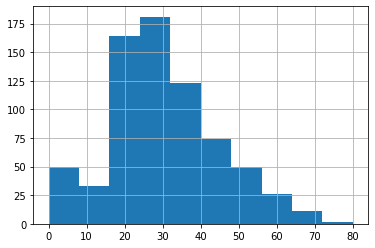

In [16]:
titanic['Age'].hist()

In [17]:
titanic[titanic['Age'].isnull()==True]

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Female,Male,Name_Pref
5,0,3,NaN,0,0,8.4583,NaN,1,0.0,1.0,12
17,1,2,NaN,0,0,13.0000,NaN,2,0.0,1.0,12
19,1,3,NaN,0,0,7.2250,NaN,0,1.0,0.0,13
26,0,3,NaN,0,0,7.2250,NaN,0,0.0,1.0,12
28,1,3,NaN,0,0,7.8792,NaN,1,1.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,NaN,0,0,7.2292,NaN,0,0.0,1.0,12
863,0,3,NaN,8,2,69.5500,NaN,2,1.0,0.0,9
868,0,3,NaN,0,0,9.5000,NaN,2,0.0,1.0,12
878,0,3,NaN,0,0,7.8958,NaN,2,0.0,1.0,12


In [18]:
age_group_mean=(titanic.groupby("Name_Pref")["Age"].mean()).apply(np.floor)

In [19]:
age_group_mean

Name_Pref
0     70.0
1     58.0
2     33.0
3     40.0
4     42.0
5     38.0
6     48.0
7     48.0
8      4.0
9     21.0
10    24.0
11    24.0
12    32.0
13    35.0
14    28.0
15    43.0
16    49.0
Name: Age, dtype: float64

In [20]:
titanic['Age'].fillna(value=-1, inplace=True)

<AxesSubplot:>

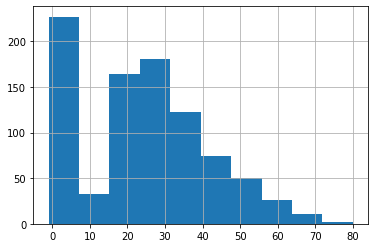

In [21]:
titanic['Age'].hist()

In [22]:
for i in range(len(titanic)):
    if titanic['Age'][i] == -1:
        pref=titanic['Name_Pref'][i]
        titanic['Age'][i]= age_group_mean[pref]

C:\Users\perezm47\AppData\Local\Temp/ipykernel_17040/18535114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'][i]= age_group_mean[pref]


<AxesSubplot:>

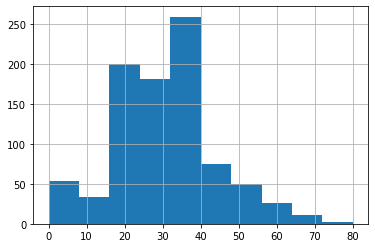

In [23]:
titanic['Age'].hist()

La distribuvion entre la variable edad actual y la original es bastante parecida con lo que podemos suponer que no hay demasiado ruido al rellenar esta variable

### Cabin
Por el momento la variable Cabin sera eliminada

In [24]:
titanic=titanic.drop(['Cabin'],axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female,Male,Name_Pref
0,0,3,22.0,1,0,7.2500,2,0.0,1.0,12
1,1,1,38.0,1,0,71.2833,0,1.0,0.0,13
2,1,3,26.0,0,0,7.9250,2,1.0,0.0,9
3,1,1,35.0,1,0,53.1000,2,1.0,0.0,13
4,0,3,35.0,0,0,8.0500,2,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,0.0,1.0,15
887,1,1,19.0,0,0,30.0000,2,1.0,0.0,9
888,0,3,21.0,1,2,23.4500,2,1.0,0.0,9
889,1,1,26.0,0,0,30.0000,0,0.0,1.0,12


## Outliers

In [25]:
#Pensar

# Modelado

## Variable Predictora y Predictores

In [26]:
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

## Datos de entrenamiento, validacion y testeo

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Decision Tree

In [28]:
# Se guarda el modelo en una variable
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Se entrena el modelo de árbol de decisión
decision_tree = decision_tree.fit(X_train,y_train)

In [29]:
y_pred = decision_tree.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8444444444444444


In [31]:
confusion_matrix(y_test, y_pred)

array([[46,  8],
       [ 6, 30]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



## Random Forest

In [69]:
random_forest= RandomForestClassifier(max_depth=5, random_state=0)
random_forest=random_forest.fit(X_train, y_train)

In [70]:
y_pred = random_forest.predict(X_test)

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [72]:
confusion_matrix(y_test, y_pred)

array([[46,  8],
       [ 7, 29]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



## SVM

In [38]:
s_vm= svm.SVC()
s_vm=s_vm.fit(X_train, y_train)

In [39]:
y_pred = s_vm.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


## KNN

In [41]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh = neigh.fit(X_train, y_train)

In [42]:
y_pred = neigh.predict(X_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333
